In [1]:
#  IMPORT LIBRARIES AND DATASETS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset
prod_data=pd.read_csv('production_data.csv')

In [3]:
prod_data.head()

,Unnamed: 0,_id,originName,packageCntSum,totalWeightSum,districtName,season,transmode,impExpFlag,commodity,...,minute_before,minute_after,minute_between,time_lapse_1,time_lapse_2,time_lapse_between,duration_second,start_time_datetime,start_time_day_name,start_time_hour
0,0,5f15560b04c6e60318f4a6db,CALIFORNIA-CENTRAL,34406.0,275248,SANTA MARIA,2020,Truck,D,Strawberries,...,20,20,0,30,44,14,3,2020-07-20 01:30:03.591000000,Monday,1
1,1,5f15560b04c6e60318f4a6d8,CALIFORNIA-CENTRAL,223531.0,1788248,SANTA MARIA,2020,Truck,D,Strawberries,...,20,20,0,30,44,14,3,2020-07-20 01:30:03.585000000,Monday,1
2,2,5f15560b04c6e60318f4a6da,CALIFORNIA-CENTRAL,84086.0,672688,SALINAS-WATSONVILLE,2020,Truck,D,Strawberries,...,20,20,0,30,44,14,3,2020-07-20 01:30:03.589000000,Monday,1
3,3,5f15560b04c6e60318f4a6d9,CALIFORNIA-CENTRAL,504863.0,4038904,SALINAS-WATSONVILLE,2020,Truck,D,Strawberries,...,20,20,0,30,44,14,3,2020-07-20 01:30:03.588000000,Monday,1
4,4,5f1557638f20cd2595f9719a,CALIFORNIA-SOUTH,78.0,624,OXNARD DISTRICT,2019,Truck,D,Strawberries,...,20,20,0,35,0,-35,47,2020-07-20 01:35:47.691000000,Monday,1


In [4]:
prod_data.tail(2)

,Unnamed: 0,_id,originName,packageCntSum,totalWeightSum,districtName,season,transmode,impExpFlag,commodity,...,minute_before,minute_after,minute_between,time_lapse_1,time_lapse_2,time_lapse_between,duration_second,start_time_datetime,start_time_day_name,start_time_hour
1925,1925,5f15540c8f20cd2595f6a1a7,FLORIDA,2752.0,22016,FLORIDA DISTRICTS,2019,Truck,D,Strawberries,...,20,20,0,21,44,23,32,2020-07-20 01:21:32.241000000,Monday,1
1926,1926,5f15540c8f20cd2595f6a1a6,FLORIDA,54638.0,437104,FLORIDA DISTRICTS,2019,Truck,D,Strawberries,...,20,20,0,21,44,23,32,2020-07-20 01:21:32.239000000,Monday,1


In [5]:
#  26 features in total, each contains 1927 data points
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1927 non-null   int64  
 1   _id                  1927 non-null   object 
 2   originName           1927 non-null   object 
 3   packageCntSum        1927 non-null   float64
 4   totalWeightSum       1927 non-null   int64  
 5   districtName         1927 non-null   object 
 6   season               1927 non-null   int64  
 7   transmode            1927 non-null   object 
 8   impExpFlag           1927 non-null   object 
 9   commodity            1927 non-null   object 
 10  organic              1927 non-null   bool   
 11  reportDate           1927 non-null   object 
 12  checksum_sha256      1927 non-null   object 
 13  crawl_date           1927 non-null   object 
 14  pdwInd               227 non-null    object 
 15  pdwDate              1927 non-null   o

In [6]:
# statistics
prod_data.describe()

,Unnamed: 0,packageCntSum,totalWeightSum,season,minute_before,minute_after,minute_between,time_lapse_1,time_lapse_2,time_lapse_between,duration_second,start_time_hour
count,1927.000000,1927.000000,1.927000e+03,1927.000000,1927.0,1927.0,1927.0,1927.000000,1927.000000,1927.000000,1927.000000,1927.0
mean,963.000000,100877.454749,7.514733e+05,2019.394914,20.0,20.0,0.0,27.744681,38.816814,11.072133,29.459782,1.0
std,556.421303,165851.414860,1.342030e+06,0.488959,0.0,0.0,0.0,3.798424,14.187996,14.769798,17.326032,0.0
min,0.000000,-15828.000000,-2.367090e+05,2019.000000,20.0,20.0,0.0,21.000000,0.000000,-35.000000,0.000000,1.0
25%,481.500000,4198.500000,2.258400e+04,2019.000000,20.0,20.0,0.0,25.000000,44.000000,12.000000,14.000000,1.0
50%,963.000000,26067.000000,1.218400e+05,2019.000000,20.0,20.0,0.0,28.000000,44.000000,15.000000,30.000000,1.0
75%,1444.500000,100877.454749,7.066920e+05,2020.000000,20.0,20.0,0.0,31.000000,44.000000,19.000000,45.000000,1.0
max,1926.000000,906038.000000,7.248304e+06,2020.000000,20.0,20.0,0.0,35.000000,44.000000,23.000000,59.000000,1.0


In [7]:
# VISUALIZE DATASET
# Let's replace the 'Attritition' and 'overtime' column with integers before performing any visualizations 
# prod_data['commodity'] = prod_data['commodity'].apply(lambda x: 1 if x == 'Strawberries' else 0)
prod_data['transmode'] = prod_data['transmode'].apply(lambda x: 1 if x == 'Truck' else 0)
prod_data['impExpFlag'] = prod_data['impExpFlag'].apply(lambda x: 1 if x == 'D' else 0)

In [8]:
prod_data.head(1)

,Unnamed: 0,_id,originName,packageCntSum,totalWeightSum,districtName,season,transmode,impExpFlag,commodity,...,minute_before,minute_after,minute_between,time_lapse_1,time_lapse_2,time_lapse_between,duration_second,start_time_datetime,start_time_day_name,start_time_hour
0,0,5f15560b04c6e60318f4a6db,CALIFORNIA-CENTRAL,34406.0,275248,SANTA MARIA,2020,1,1,Strawberries,...,20,20,0,30,44,14,3,2020-07-20 01:30:03.591000000,Monday,1


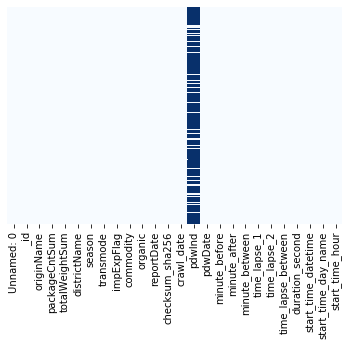

In [9]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(prod_data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

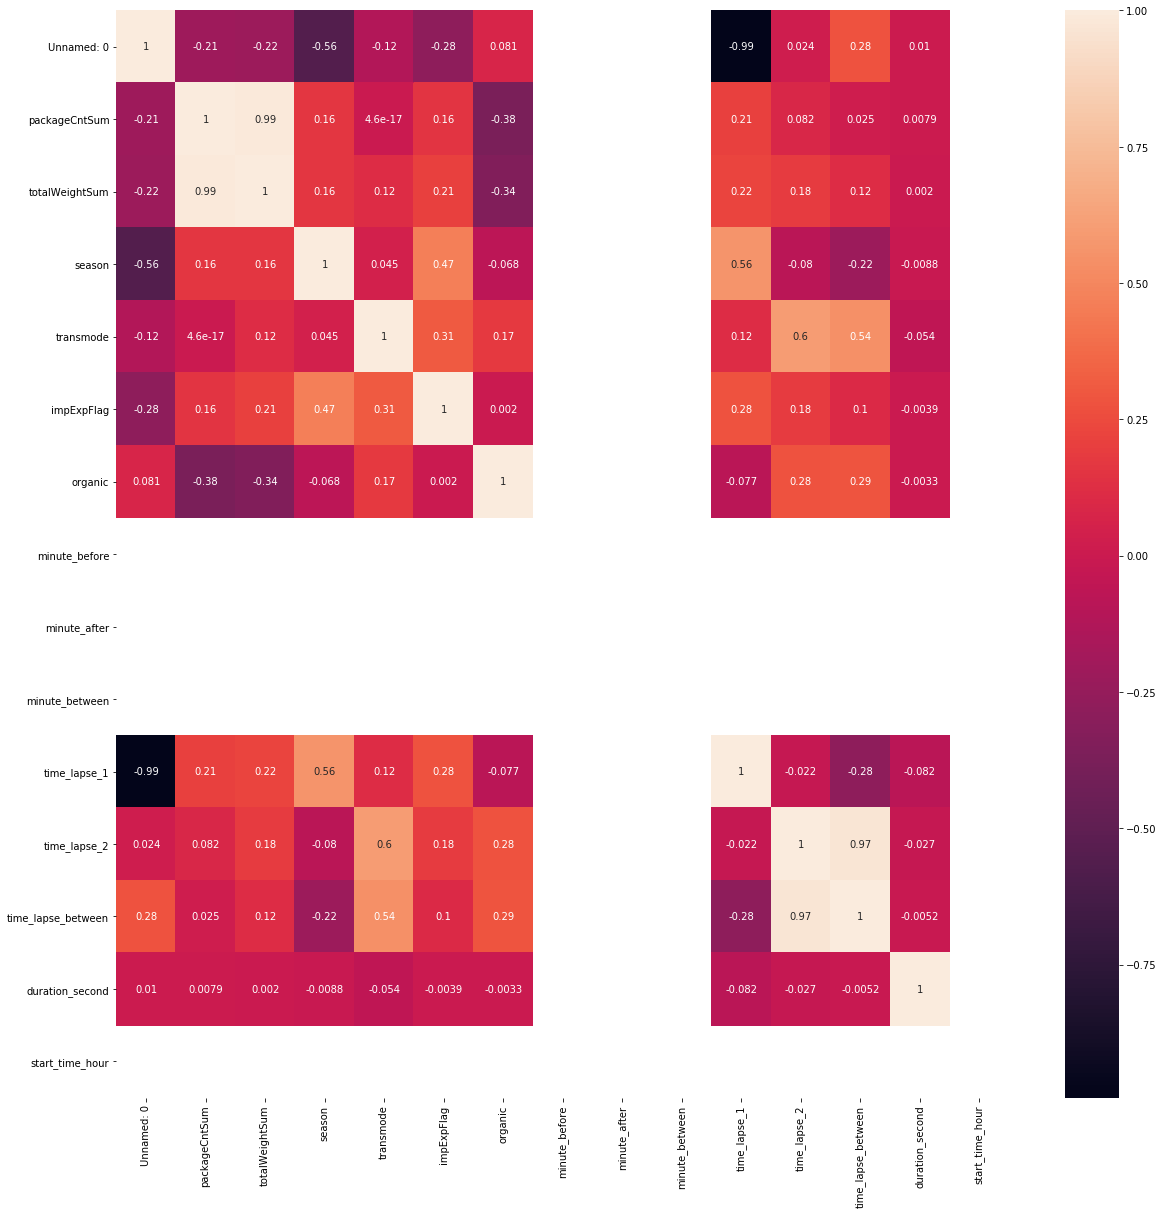

In [10]:
correlations = prod_data.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

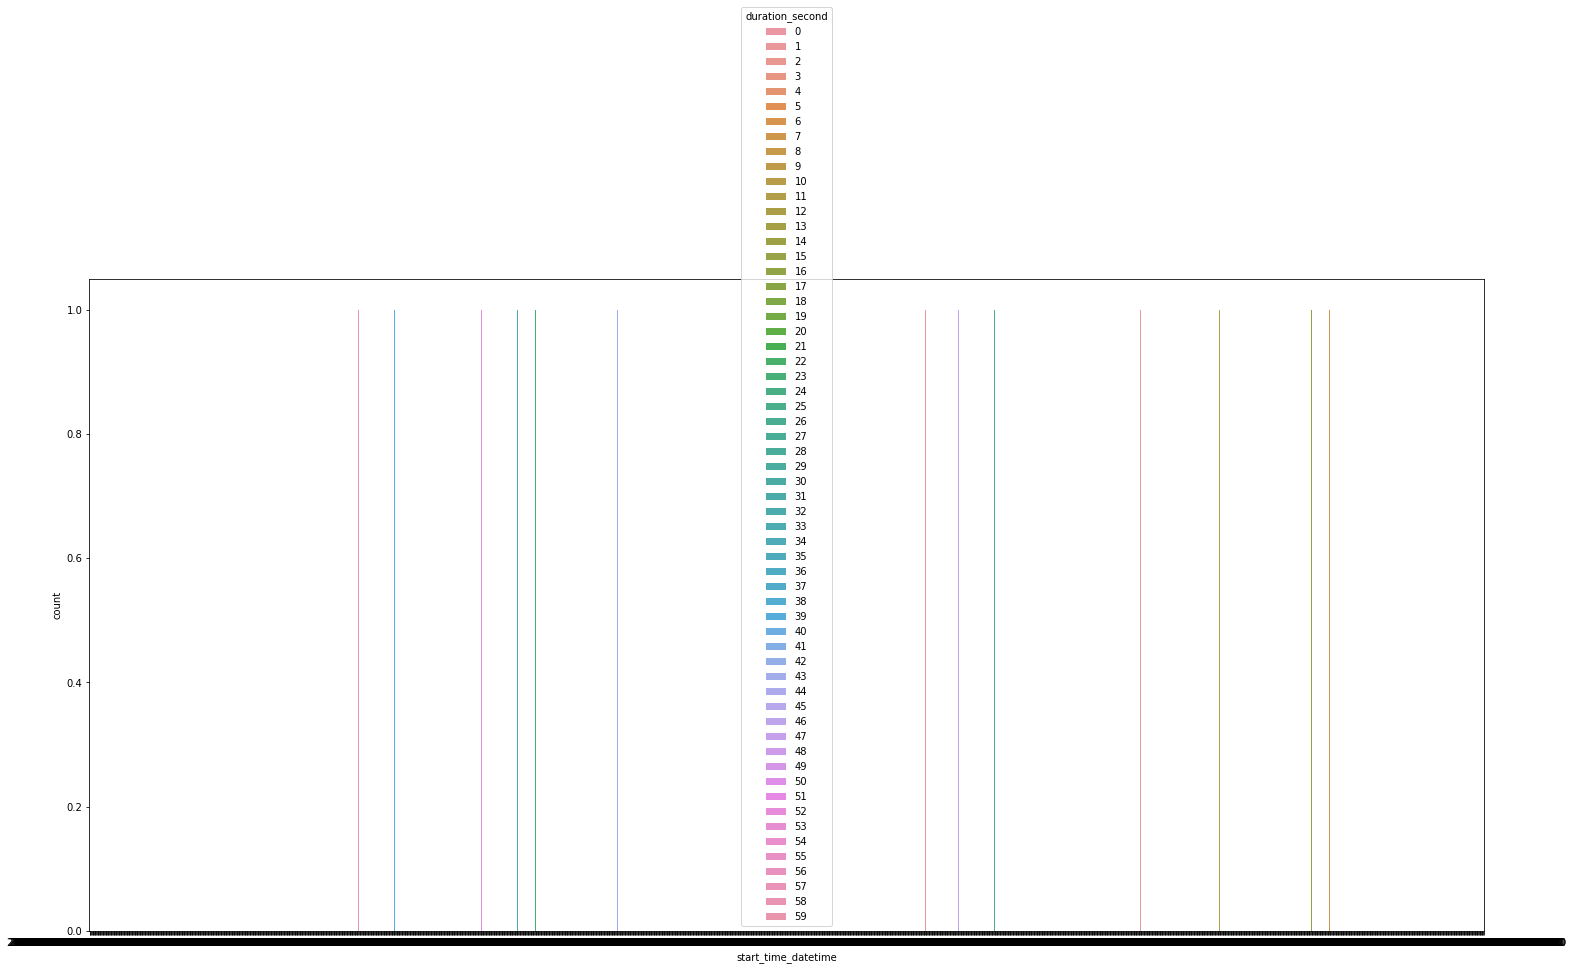

In [11]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'start_time_datetime', hue = 'duration_second', data = prod_data)

In [12]:
import squarify
import matplotlib.pyplot as plt
import numpy as np
from vega_datasets import data as vds
import pygal

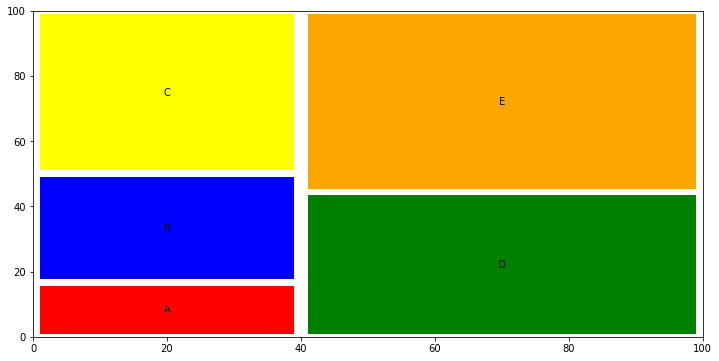

In [13]:
plt.figure(figsize=(12,6))
squarify.plot(sizes=[25,50,75,100,125],color=['red','blue','yellow','green','orange'],label=['A','B','C','D','E'],pad=True)

In [ ]:
total_count=(prod_data.groupby('commodity')['crawl_date'].count().sort_values(ascending=False).reset_index(name='total_count'))

In [ ]:
total_count